In [1]:
""" importamos libreriaS """
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://www.analyticsvidhya.com/blog/2021/06/download-financial-dataset-using-yahoo-finance-in-python-a-complete-guide/

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 865 kB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf

In [4]:
 df = yf.download(['AAPL','MSFT','GOOG','NFLX','NVDA'], 
                      start='2012-01-01', 
                      end='2022-05-12', 
                      progress=False,
)
df.head()

Adj Close                                                  Close  \
                 AAPL        GOOG       MSFT       NFLX      NVDA       AAPL   
Date                                                                           
2012-01-03  12.557467  331.462585  21.572889  10.320000  3.223773  14.686786   
2012-01-04  12.624951  332.892242  22.080582  11.492857  3.260512  14.765714   
2012-01-05  12.765114  328.274536  22.306223  11.328571  3.377614  14.929643   
2012-01-06  12.898556  323.796326  22.652742  12.327143  3.338580  15.085714   
2012-01-09  12.878098  310.067780  22.354578  14.025714  3.338580  15.061786   

                                                      ...       Open  \
                  GOOG       MSFT       NFLX    NVDA  ...       AAPL   
Date                                                  ...              
2012-01-03  331.462585  26.770000  10.320000  3.5100  ...  14.621429   
2012-01-04  332.892242  27.400000  11.492857  3.5500  ...  14.642857   
2012-01-05  328.274536  27.680000  11.328571  3.6775  ...  14.819643   
2012-01-06  323.796326  28.110001  12.327143  3.6350  ...  14.991786   
2012-01-09  310.067780  27.740000  14.025714  3.6350  ...  15.196429   

                                                         Volume            \
                  GOOG       MSFT       NFLX    NVDA       AAPL      GOOG   
Date                                                                        
2012-01-03  325.250885  26.549999  10.040000  3.5750  302220800   7380561   
2012-01-04  331.273315  26.820000  10.335714  3.5125  260022000   5749470   
2012-01-05  329.828735  27.379999  11.345714  3.5325  271269600   6590410   
2012-01-06  328.344299  27.530001  11.302857  3.6750  318292800   5405987   
2012-01-09  322.042908  28.049999  12.801429  3.6375  394024400  11688849   

                                           
                MSFT       NFLX      NVDA  
Date                                       
2012-01-03  64731500   29213800  46804400  
2012-01-04  80516100  100489900  34737200  
2012-01-05  56081400   86552900  56354800  
2012-01-06  99455500  125610800  53325200  
2012-01-09  59706800  214073300  50824400  

[5 rows x 30 columns]

In [5]:
df2= df.iloc[:,:4].reset_index()
df2.head()

Date  Adj Close                                  
                   AAPL        GOOG       MSFT       NFLX
0 2012-01-03  12.557467  331.462585  21.572889  10.320000
1 2012-01-04  12.624951  332.892242  22.080582  11.492857
2 2012-01-05  12.765114  328.274536  22.306223  11.328571
3 2012-01-06  12.898556  323.796326  22.652742  12.327143
4 2012-01-09  12.878098  310.067780  22.354578  14.025714

La idea es que: Con un solo modelo, debemos hacer 5 predicciones de 5 variables diferentes

In [6]:
df2.columns = ['Fecha','AAPL','MSFT','GOOG','NFLX']
df2.head()

,Fecha,AAPL,MSFT,GOOG,NFLX
0,2012-01-03,12.557467,331.462585,21.572889,10.320000
1,2012-01-04,12.624951,332.892242,22.080582,11.492857
2,2012-01-05,12.765114,328.274536,22.306223,11.328571
3,2012-01-06,12.898556,323.796326,22.652742,12.327143
4,2012-01-09,12.878098,310.067780,22.354578,14.025714


In [7]:
len(df)

2607

Plot de las variables en el tiempo("Ciclo")

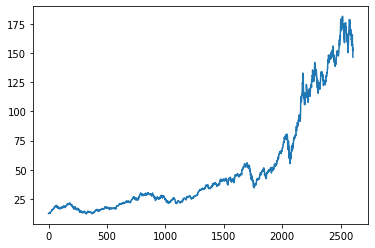

In [8]:
df2.iloc[:,1].plot()

Procedemos a normalizar la data (anular dinamizacion de columnas)

In [9]:
melt = df2.melt(id_vars='Fecha',var_name='Empresa',value_name='monto')
melt.head()

,Fecha,Empresa,monto
0,2012-01-03,AAPL,12.557467
1,2012-01-04,AAPL,12.624951
2,2012-01-05,AAPL,12.765114
3,2012-01-06,AAPL,12.898556
4,2012-01-09,AAPL,12.878098


Ordenar los datos en funcion del ciclo luego sensor
order by ciclo, sensor (filas)

Ordenando las columnas

In [10]:
melt = melt.sort_values(['Fecha','Empresa'])
melt = melt.loc[:,['Empresa','Fecha','monto']]
melt.head(10)

,Empresa,Fecha,monto
0,AAPL,2012-01-03,12.557467
5214,GOOG,2012-01-03,21.572889
2607,MSFT,2012-01-03,331.462585
7821,NFLX,2012-01-03,10.320000
1,AAPL,2012-01-04,12.624951
5215,GOOG,2012-01-04,22.080582
2608,MSFT,2012-01-04,332.892242
7822,NFLX,2012-01-04,11.492857
2,AAPL,2012-01-05,12.765114
5216,GOOG,2012-01-05,22.306223


In [11]:
melt.shape

(10428, 3)

In [12]:
melt[melt['Empresa']=='AAPL'].head(10)

,Empresa,Fecha,monto
0,AAPL,2012-01-03,12.557467
1,AAPL,2012-01-04,12.624951
2,AAPL,2012-01-05,12.765114
3,AAPL,2012-01-06,12.898556
4,AAPL,2012-01-09,12.878098
5,AAPL,2012-01-10,12.924207
6,AAPL,2012-01-11,12.903137
7,AAPL,2012-01-12,12.867716
8,AAPL,2012-01-13,12.819468
9,AAPL,2012-01-17,12.968792


Creamos una variable del valor de campo del ciclo anterior

In [13]:
melt['t-1'] = melt.groupby('Empresa')['monto'].shift(1)
melt[melt['Empresa']=='AAPL'].head()

,Empresa,Fecha,monto,t-1
0,AAPL,2012-01-03,12.557467,NaN
1,AAPL,2012-01-04,12.624951,12.557467
2,AAPL,2012-01-05,12.765114,12.624951
3,AAPL,2012-01-06,12.898556,12.765114
4,AAPL,2012-01-09,12.878098,12.898556


Generar una columna con las primeras diferencias monto(t) - monto(t-1)

In [14]:
melt['diff_1'] = melt.groupby('Empresa')['monto'].diff(1)
melt[melt['Empresa']=='AAPL'].head()

,Empresa,Fecha,monto,t-1,diff_1
0,AAPL,2012-01-03,12.557467,NaN,NaN
1,AAPL,2012-01-04,12.624951,12.557467,0.067485
2,AAPL,2012-01-05,12.765114,12.624951,0.140162
3,AAPL,2012-01-06,12.898556,12.765114,0.133442
4,AAPL,2012-01-09,12.878098,12.898556,-0.020458


Generamos una variable para el MA (w = 4)

In [15]:
melt['MA_4']= melt.groupby('Empresa')['monto'].rolling(4).mean().reset_index(level=0,drop=True)

In [16]:
melt[melt['Empresa']=='AAPL'].head()

,Empresa,Fecha,monto,t-1,diff_1,MA_4
0,AAPL,2012-01-03,12.557467,NaN,NaN,NaN
1,AAPL,2012-01-04,12.624951,12.557467,0.067485,NaN
2,AAPL,2012-01-05,12.765114,12.624951,0.140162,NaN
3,AAPL,2012-01-06,12.898556,12.765114,0.133442,12.711522
4,AAPL,2012-01-09,12.878098,12.898556,-0.020458,12.791680


In [17]:
melt['vf1'] = melt.groupby('Empresa')['monto'].shift(-1)
melt['vf2'] = melt.groupby('Empresa')['monto'].shift(-2)
melt['vf3'] = melt.groupby('Empresa')['monto'].shift(-3)
melt['vf4'] = melt.groupby('Empresa')['monto'].shift(-4)
melt['vf5'] = melt.groupby('Empresa')['monto'].shift(-5)
melt['vf6'] = melt.groupby('Empresa')['monto'].shift(-6)
melt['vf7'] = melt.groupby('Empresa')['monto'].shift(-7)
melt['vf8'] = melt.groupby('Empresa')['monto'].shift(-8)
melt.head()

,Empresa,Fecha,monto,t-1,diff_1,MA_4,vf1,vf2,vf3,vf4,vf5,vf6,vf7,vf8
0,AAPL,2012-01-03,12.557467,NaN,NaN,NaN,12.624951,12.765114,12.898556,12.878098,12.924207,12.903137,12.867716,12.819468
5214,GOOG,2012-01-03,21.572889,NaN,NaN,NaN,22.080582,22.306223,22.652742,22.354578,22.435162,22.338457,22.564096,22.765562
2607,MSFT,2012-01-03,331.462585,NaN,NaN,NaN,332.892242,328.274536,323.796326,310.067780,310.406525,311.811249,313.644379,311.328064
7821,NFLX,2012-01-03,10.320000,NaN,NaN,NaN,11.492857,11.328571,12.327143,14.025714,13.690000,13.164286,13.164286,13.482857
1,AAPL,2012-01-04,12.624951,12.557467,0.067485,NaN,12.765114,12.898556,12.878098,12.924207,12.903137,12.867716,12.819468,12.968792


In [18]:
melt=melt.dropna()
len(melt)

10384

Split

In [19]:
split_point = int(len(df)*.80)
split_point
melt_train = melt[:split_point].copy()
melt_valid = melt[split_point:].copy()

La matriz de caracteristicas X, y

In [20]:
features = melt.columns[2:-1]

In [21]:
X_train = melt_train[features]
y_train = melt_train['vf8']

Creando el modelo de ML

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
mod1 = RandomForestRegressor(n_estimators = 100,random_state=0,n_jobs = -1,ccp_alpha=0.01)
mod1.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=0.01, n_jobs=-1, random_state=0)

In [24]:
Xval = melt_valid[features]
yval = melt_valid['vf8']
p = mod1.predict(Xval)

In [25]:
# score con data train

mod1.score(X_train,y_train)

0.999926559621974

In [39]:
mod1.score(Xval,yval)

0.37947143111133685

In [26]:
y_test = melt_valid['vf8']

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yval)

0.0

Predict New examples

In [28]:
melt_valid.tail()

,Empresa,Fecha,monto,t-1,diff_1,MA_4,vf1,vf2,vf3,vf4,vf5,vf6,vf7,vf8
10418,NFLX,2022-04-28,199.520004,188.539993,10.980011,199.092499,190.360001,199.460007,199.869995,204.009995,188.320007,180.970001,173.100006,177.660004
2598,AAPL,2022-04-29,157.418701,163.399918,-5.981216,158.432220,157.728256,159.246017,165.776428,156.540009,157.279999,152.059998,154.509995,146.500000
7812,GOOG,2022-04-29,276.875122,288.957001,-12.081879,279.496529,283.808990,281.125244,289.306183,276.705536,274.091614,263.965179,268.873779,259.944550
5205,MSFT,2022-04-29,2299.330078,2388.229980,-88.899902,2344.522522,2343.139893,2362.590088,2451.500000,2334.929932,2313.199951,2261.679932,2291.689941,2279.219971
10419,NFLX,2022-04-29,190.360001,199.520004,-9.160004,194.204998,199.460007,199.869995,204.009995,188.320007,180.970001,173.100006,177.660004,166.369995


In [29]:
new_examples = melt_train

In [30]:
new_examples.head()

,Empresa,Fecha,monto,t-1,diff_1,MA_4,vf1,vf2,vf3,vf4,vf5,vf6,vf7,vf8
3,AAPL,2012-01-06,12.898556,12.765114,0.133442,12.711522,12.878098,12.924207,12.903137,12.867716,12.819468,12.968792,13.103456,13.061926
5217,GOOG,2012-01-06,22.652742,22.306223,0.346519,22.153109,22.354578,22.435162,22.338457,22.564096,22.765562,22.773623,22.749439,22.660803
2610,MSFT,2012-01-06,323.796326,328.274536,-4.478210,329.106422,310.067780,310.406525,311.811249,313.644379,311.328064,313.116364,315.273285,318.590851
7824,NFLX,2012-01-06,12.327143,11.328571,0.998571,11.367143,14.025714,13.690000,13.164286,13.164286,13.482857,13.531429,14.077143,14.780000
4,AAPL,2012-01-09,12.878098,12.898556,-0.020458,12.791680,12.924207,12.903137,12.867716,12.819468,12.968792,13.103456,13.061926,12.834433


In [31]:
y_p = mod1.predict(new_examples[features])
y_p

array([ 13.29912415,  22.77778702, 316.50353499, ..., 590.46786812,
        61.41434292,  17.43369628])

In [32]:
new_examples['p_model'] = y_p


In [33]:
new_examples

,Empresa,Fecha,monto,t-1,diff_1,MA_4,vf1,vf2,vf3,vf4,vf5,vf6,vf7,vf8,p_model
3,AAPL,2012-01-06,12.898556,12.765114,0.133442,12.711522,12.878098,12.924207,12.903137,12.867716,12.819468,12.968792,13.103456,13.061926,13.299124
5217,GOOG,2012-01-06,22.652742,22.306223,0.346519,22.153109,22.354578,22.435162,22.338457,22.564096,22.765562,22.773623,22.749439,22.660803,22.777787
2610,MSFT,2012-01-06,323.796326,328.274536,-4.478210,329.106422,310.067780,310.406525,311.811249,313.644379,311.328064,313.116364,315.273285,318.590851,316.503535
7824,NFLX,2012-01-06,12.327143,11.328571,0.998571,11.367143,14.025714,13.690000,13.164286,13.164286,13.482857,13.531429,14.077143,14.780000,14.040957
4,AAPL,2012-01-09,12.878098,12.898556,-0.020458,12.791680,12.924207,12.903137,12.867716,12.819468,12.968792,13.103456,13.061926,12.834433,13.301050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,AAPL,2014-02-03,15.839052,15.809672,0.029380,15.811730,16.068331,16.188337,16.282701,16.510494,16.806276,17.027721,17.026445,17.296810,17.347884
5737,GOOG,2014-02-03,31.143896,32.304962,-1.161066,31.553685,31.032923,30.580439,30.887783,31.212194,31.417091,31.732962,31.989094,32.108612,31.947379
3130,MSFT,2014-02-03,564.598755,588.279968,-23.681213,567.461761,566.954895,569.465515,577.814209,586.521545,584.275024,592.867798,591.129272,597.709656,590.467868
8344,NFLX,2014-02-03,57.768570,58.475716,-0.707146,57.814286,57.987144,57.774284,58.272858,61.425713,61.491428,61.998569,61.275715,62.364285,61.414343


In [34]:
feat = ['Empresa','Fecha','monto','p_model']
for_plot = new_examples[feat]

In [35]:
for_plot.head()

,Empresa,Fecha,monto,p_model
3,AAPL,2012-01-06,12.898556,13.299124
5217,GOOG,2012-01-06,22.652742,22.777787
2610,MSFT,2012-01-06,323.796326,316.503535
7824,NFLX,2012-01-06,12.327143,14.040957
4,AAPL,2012-01-09,12.878098,13.301050


In [36]:
import seaborn as sns

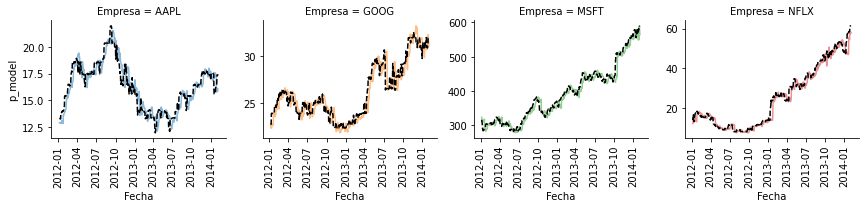

In [37]:
g = sns.FacetGrid(for_plot
                      ,col="Empresa"
                     ,col_wrap = 4
                      ,sharey = False
                      ,sharex = True
                  ,hue = 'Empresa'
                   )
g.map(sns.lineplot, 'Fecha', "monto", alpha = 0.5)   # original
g.map(sns.lineplot, 'Fecha', "p_model",color ='k',linestyle ='dashed')   # modelo

# esta parte hace la rotación por cada plot

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()